In [3]:
"""
ANIRBAN SOM 
"""

!pip install squarify
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

import squarify
import matplotlib.pyplot as plt
%matplotlib inline

virtualenv 20.0.33 has requirement importlib-metadata<3,>=0.12; python_version < "3.8", but you'll have importlib-metadata 4.11.4 which is incompatible.
You are using pip version 10.0.1, however version 22.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
online_retail_df = pd.read_csv('Online Retail.csv',sep=",", encoding="ISO-8859-1", header=0)
online_retail_df=online_retail_df.rename(columns={'ï»¿InvoiceNo':'InvoiceNo'})
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010,3.39,17850.0,United Kingdom


In [5]:
online_retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
online_retail_df = online_retail_df.dropna()

#removing duplicates
online_retail_df.drop_duplicates(keep='first', inplace=True)
#online_retail_df.shape

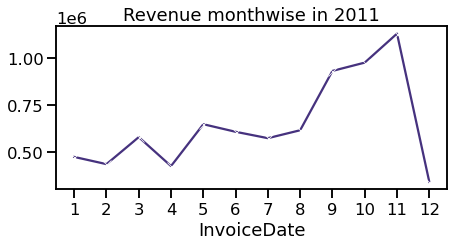

In [13]:
online_retail_clean = online_retail_df.copy()
#calculate revenue per row and add new column
online_retail_clean['Revenue_gen'] = online_retail_clean['Quantity'] * online_retail_clean['UnitPrice']

online_retail_clean['InvoiceDate'] = pd.to_datetime(online_retail_clean['InvoiceDate'])

# Let's visualize the top grossing months
retail_month = online_retail_clean[online_retail_clean.InvoiceDate.dt.year==2011]
monthly_gross_rev = retail_month.groupby(retail_month.InvoiceDate.dt.month).Revenue_gen.sum()

plt.figure(figsize=(7,3))
sns.set_context("talk")
sns.set_palette("viridis")
sns.lineplot(y=monthly_gross_rev.values,x=monthly_gross_rev.index, marker='x')
plt.xticks(range(1,13))
plt.title("Revenue monthwise in 2011")
plt.show()

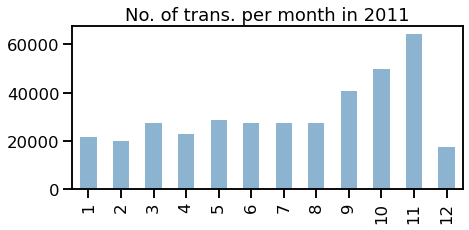

In [10]:
#amount of transactions per month
plt.figure(figsize=(7,3))
online_retail_clean[online_retail_clean.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar')
plt.title("No. of trans. per month in 2011")
plt.show()

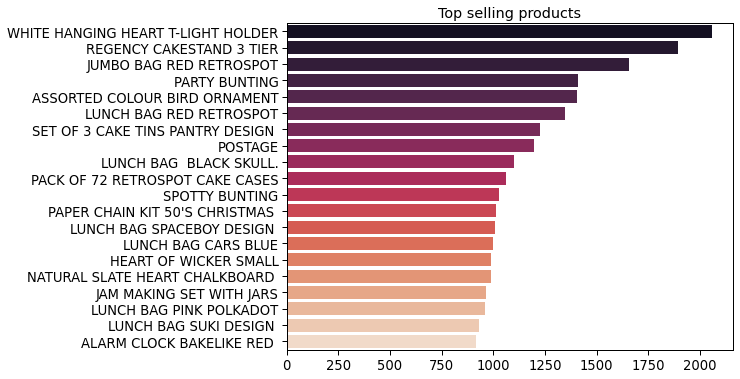

<Figure size 432x288 with 0 Axes>

In [12]:
# Let's visualize some top products from the whole range
top_prods = online_retail_clean['Description'].value_counts()[:20]
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_prods.index,
            x = top_prods.values, 
           palette='rocket')
plt.title("Top selling products")
plt.show()
plt.savefig('top_products.png')

In [14]:
#creating invoice month column to see first month when customer purchased 
online_retail_clean['InvoiceMonth'] = online_retail_clean['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))

grouping = online_retail_clean.groupby('CustomerID')['InvoiceMonth']
#assign smallest invoice value to each customer
online_retail_clean['CohortMonth'] = grouping.transform('min')
online_retail_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue_gen,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [16]:
#function to extract year, month, day as integers
def get_date_asinteger(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day


#extract month
invoice_year, invoice_month, _ = get_date_asinteger(online_retail_clean, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_asinteger(online_retail_clean, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# Extract the difference in days from all previous values
online_retail_clean['CohortIndex'] = years_diff * 12 + months_diff + 1
online_retail_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue_gen,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [17]:
#count monthly active customers from each cohort
grouping = online_retail_clean.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns = 'CohortIndex', values='CustomerID')

#Customer retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention = retention.round(3) * 100
retention.head(20)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


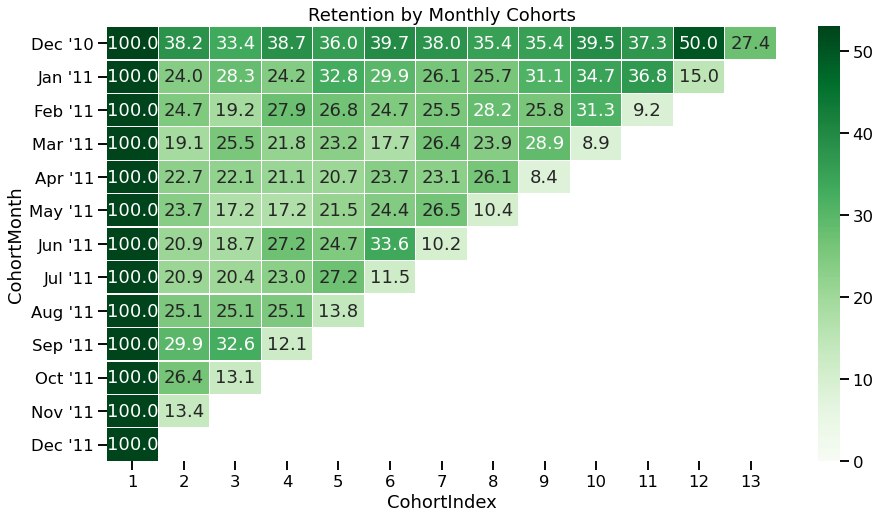

In [18]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()


In [20]:
#12 months of data
print('Min:{}; Max:{}'.format(min(online_retail_clean.InvoiceDate), max(online_retail_clean.InvoiceDate)))

Min:2010-12-01 00:00:00; Max:2011-12-09 00:00:00


In [21]:
#calculate revenue per row and add new column
online_retail_clean['MonetaryValue'] = online_retail_clean['Quantity'] * online_retail_clean['UnitPrice']

#let's look at amount spend per customer (revenue contributed) M-Monetary
retail_M = online_retail_clean.groupby(['CustomerID']).agg({'MonetaryValue': sum}).reset_index()
retail_M.head()

,CustomerID,MonetaryValue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [22]:
#F-frequency (how many purchases each customer made)
retail_f = online_retail_clean.groupby('CustomerID')['InvoiceNo'].count()
retail_f = retail_f.reset_index()
retail_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [24]:
#merge previous dataframes together (mv+f)
retail_mv_f = pd.merge(retail_M, retail_f, on='CustomerID', how='inner')
retail_mv_f.head()

,CustomerID,MonetaryValue,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [25]:
#R-recency 
#last transaction date 

online_retail_clean['InvoiceDate'] = pd.to_datetime(online_retail_clean['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(online_retail_clean['InvoiceDate'])

#difference between last date and transaction date
online_retail_clean['Diff'] = max_date - online_retail_clean['InvoiceDate']
online_retail_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue_gen,InvoiceMonth,CohortMonth,CohortIndex,MonetaryValue,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1,15.30,373 days
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,20.34,373 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1,22.00,373 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,20.34,373 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,20.34,373 days


In [26]:
#recency per customer (last transaction date)
retail_r = online_retail_clean.groupby('CustomerID')['Diff'].min()
retail_r = retail_r.reset_index()

# Extract number of days only
retail_r['Diff'] = retail_r['Diff'].dt.days

In [27]:
#merge R dataframe with FM

retail_rfm = pd.merge(retail_mv_f, retail_r, on='CustomerID', how='inner')
retail_rfm.columns = ['CustomerID', 'MonetaryValue', 'Frequency', 'Recency']
retail_rfm.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310


In [28]:
#changed columns order
cols = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']
retail_rfm = retail_rfm[cols]
retail_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [29]:
# create labels and assign them to tree percentile groups 
r_labels = range(4, 0, -1)
r_groups = pd.qcut(retail_rfm.Recency, q = 4, labels = r_labels)
f_labels = range(1, 5)
f_groups = pd.qcut(retail_rfm.Frequency, q = 4, labels = f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(retail_rfm.MonetaryValue, q = 4, labels = m_labels)

# make a new column for group labels
retail_rfm['R'] = r_groups.values
retail_rfm['F'] = f_groups.values
retail_rfm['M'] = m_groups.values
# sum up the three columns
retail_rfm['RFM_Segment'] = retail_rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
retail_rfm['RFM_Score'] = retail_rfm[['R', 'F', 'M']].sum(axis = 1)
retail_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
0,12346.0,325,2,0.00,1,1,1,111,3.0
1,12347.0,2,182,4310.00,4,4,4,444,12.0
2,12348.0,75,31,1797.24,2,2,4,224,8.0
3,12349.0,18,73,1757.55,3,3,4,334,10.0
4,12350.0,310,17,334.40,1,1,2,112,4.0


In [30]:
# assign labels from total score
score_labels = ['Green', 'Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(retail_rfm.RFM_Score, q = 4, labels = score_labels)
retail_rfm['RFM_Level'] = score_groups.values
retail_rfm.sort_values(by='RFM_Score', ascending=False)
retail_rfm.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level
0,12346.0,325,2,0.00,1,1,1,111,3.0,Green
1,12347.0,2,182,4310.00,4,4,4,444,12.0,Gold
2,12348.0,75,31,1797.24,2,2,4,224,8.0,Silver
3,12349.0,18,73,1757.55,3,3,4,334,10.0,Silver
4,12350.0,310,17,334.40,1,1,2,112,4.0,Green
5,12352.0,36,95,1545.41,3,3,3,333,9.0,Silver
6,12353.0,204,4,89.00,1,1,1,111,3.0,Green
7,12354.0,232,58,1079.40,1,3,3,133,7.0,Bronze
8,12355.0,214,13,459.40,1,1,2,112,4.0,Green
9,12356.0,22,59,2811.43,3,3,4,334,10.0,Silver


In [31]:
retail_rfm_levels = retail_rfm.groupby('RFM_Level')['CustomerID'].count().reset_index(name='counts')
retail_rfm_levels.head()

,RFM_Level,counts
0,Green,1299
1,Bronze,906
2,Silver,1325
3,Gold,842


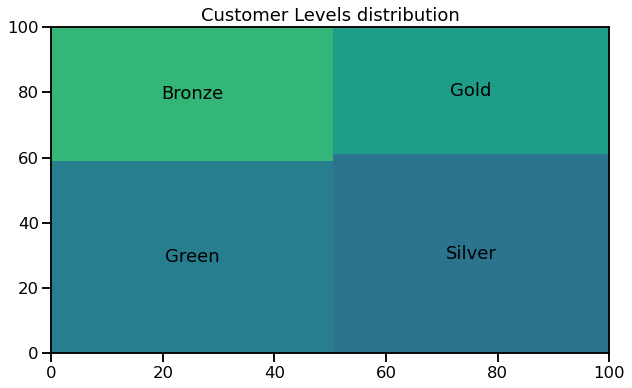

In [33]:
#let's exclude others segment for visualization
levels = list(retail_rfm_levels.RFM_Level)
score = list(retail_rfm_levels.counts)
plt.figure(figsize=(10,6))
plt.title('Customer Levels distribution')
squarify.plot(sizes=score, label=levels)

plt.show()

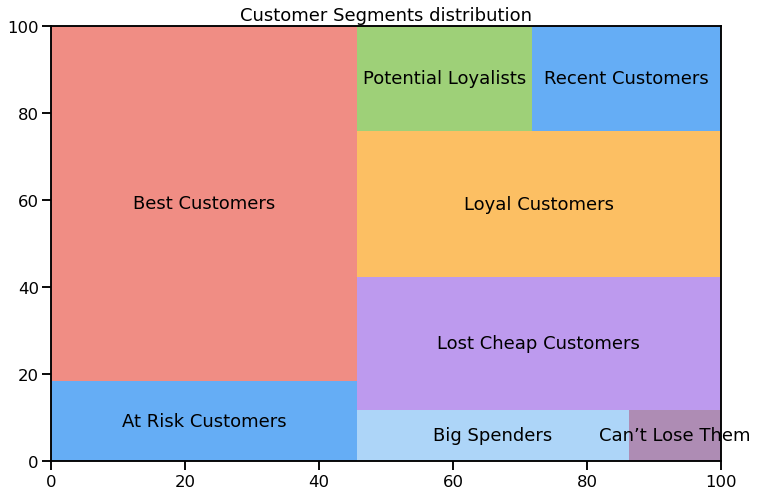

In [34]:
#let's try to do more detailed segmentation
segment_dict = {    
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Potential Loyalists':'434', # High recency and monetary value, average frequency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'At Risk Customers':'244',   # Customer's shopping less often now who used to shop a lot
    'Can’t Lose Them':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

 ##Swap the key and value of dictionary
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

# Allocate segments to each customer as per the RFM score mapping
retail_rfm['Segment'] = retail_rfm.RFM_Segment.map(lambda x: dict_segment.get(x))

# Allocate all remaining customers to others segment category
retail_rfm.Segment.fillna('others', inplace=True)

retail_rfm_segments = retail_rfm[retail_rfm.Segment!='other'].groupby('Segment')['CustomerID'].count().reset_index(name='counts')
retail_rfm_segments.iloc[:8]

#let's exclude others segment for visualization
segment = list(retail_rfm_segments.iloc[:8].Segment)
score = list(retail_rfm_segments.iloc[:8].counts)
color_list = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
plt.figure(figsize=(12,8))
plt.title('Customer Segments distribution')
squarify.plot(sizes=score, label=segment,color=color_list, alpha=0.7)

plt.show()

In [35]:
retail_rfm

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level,Segment
0,12346.0,325,2,0.00,1,1,1,111,3.0,Green,others
1,12347.0,2,182,4310.00,4,4,4,444,12.0,Gold,Best Customers
2,12348.0,75,31,1797.24,2,2,4,224,8.0,Silver,others
3,12349.0,18,73,1757.55,3,3,4,334,10.0,Silver,Big Spenders
4,12350.0,310,17,334.40,1,1,2,112,4.0,Green,others
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,180.60,1,1,1,111,3.0,Green,others
4368,18281.0,180,7,80.82,1,1,1,111,3.0,Green,others
4369,18282.0,7,13,176.60,4,1,1,411,6.0,Bronze,others
4370,18283.0,3,721,2045.53,4,4,4,444,12.0,Gold,Best Customers
